In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
import scipy.stats as sps
import datetime as dt
import matplotlib.dates as mdates
%matplotlib inline

In [2]:
#read the data
id_data = pd.read_csv("../Data/applications.csv")

In [12]:
id_data.shape

(94866, 10)

In [13]:
id_data.dtypes

record        int64
date         object
ssn           int64
firstname    object
lastname     object
address      object
zip5          int64
dob          object
homephone     int64
fraud         int64
dtype: object

In [15]:
#summary stats
id_data.describe(include="all")

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud
count,94866.000000,94866,9.486600e+04,94866,94866,94866,94866.000000,94866,9.486600e+04,94866.000000
unique,NaN,365,NaN,14626,31513,88167,NaN,30599,NaN,NaN
top,NaN,6/9/16,NaN,EASEXMJAT,ERJSAXA,8911 MZSU DR 43516,NaN,6/26/07,NaN,NaN
freq,NaN,329,NaN,1414,1515,57,NaN,9681,NaN,NaN
mean,47433.500000,NaN,5.039438e+08,NaN,NaN,NaN,49848.456612,NaN,5.186375e+09,0.212552
std,27385.599656,NaN,2.879555e+08,NaN,NaN,NaN,28889.420879,NaN,2.945905e+09,0.409116
min,1.000000,NaN,3.600000e+01,NaN,NaN,NaN,2.000000,NaN,6.353920e+05,0.000000
25%,23717.250000,NaN,2.532461e+08,NaN,NaN,NaN,24782.000000,NaN,2.606249e+09,0.000000
50%,47433.500000,NaN,5.102548e+08,NaN,NaN,NaN,50190.500000,NaN,5.248799e+09,0.000000
75%,71149.750000,NaN,7.469134e+08,NaN,NaN,NaN,74192.000000,NaN,7.855729e+09,0.000000


### Field by Field Statistics

In [16]:
#Record
len(id_data['record'])

94866

Text(0.5,1,'Application Date Distribution')

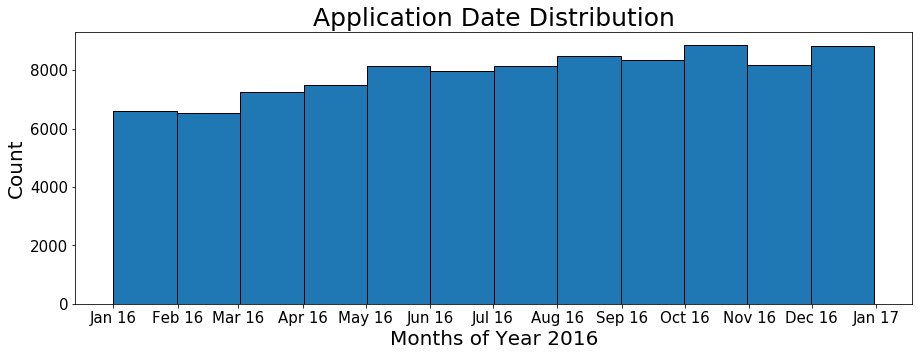

In [35]:
import matplotlib
matplotlib.rcParams.update({'font.size': 15})
#Date

#convert to date type
id_data['date']= pd.to_datetime(id_data['date'])

id_data['date'].value_counts()
#number of unique values
len(id_data['date'].unique())

#plot histogram
fig=plt.figure(figsize=(15,5))
ax = fig.add_subplot(111) 
fig=id_data['date'].hist(bins=12,edgecolor='black')
#set ticks every month
ax.xaxis.set_major_locator(mdates.MonthLocator())
#set label
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))

ax.grid(linewidth='0')
plt.xlabel("Months of Year 2016",fontdict={'fontsize':20})
plt.ylabel("Count",fontdict={'fontsize':20})
plt.title("Application Date Distribution", fontdict={'fontsize':25})

# #plot
# fig=plt.figure(figsize=(5,5))
# fig=id_data['date'].value_counts().head(20).plot(kind = 'barh')
# plt.xlabel("Count")
# plt.ylabel("Date")
# plt.title("Applications Received per each Date(Top 20)")
# fig.grid()

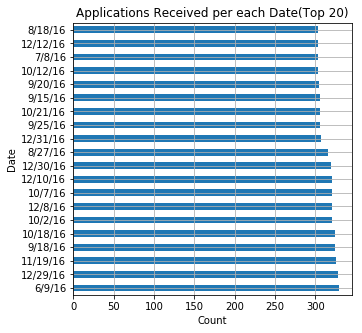

In [271]:
#plot
fig=plt.figure(figsize=(5,5))
fig=id_data['date'].value_counts().head(20).plot(kind = 'barh')
plt.xlabel("Count")
plt.ylabel("Date")
plt.title("Applications Received per each Date(Top 20)")
fig.grid()

Text(0.5,1,'Application per SSN (Top 20)')

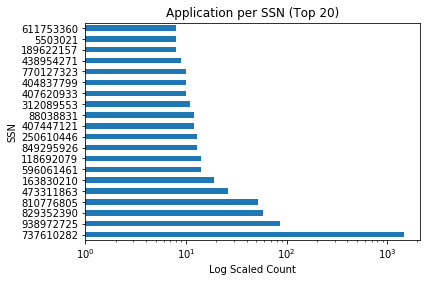

In [159]:
#SSN 
len(id_data['ssn'].unique())
#plot histogram for application per ssn
fig=plt.figure()
fig=id_data['ssn'].value_counts().head(20).plot(kind = 'barh', log=True)
plt.xlabel("Log Scaled Count")
plt.ylabel("SSN")
plt.title("Application per SSN (Top 20)")

Text(0,0.5,'Hashed Names')

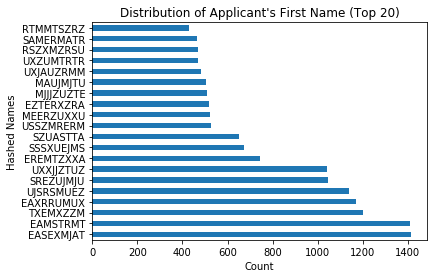

In [160]:
#Fisrt Name

len(id_data["firstname"].unique())

#plot
fig = plt.figure()
fig = id_data['firstname'].value_counts().head(20).plot(kind='barh')
plt.title("Distribution of Applicant's First Name (Top 20)")
plt.xlabel("Count")
plt.ylabel("Hashed Names")

Text(0,0.5,'Hashed Last Names')

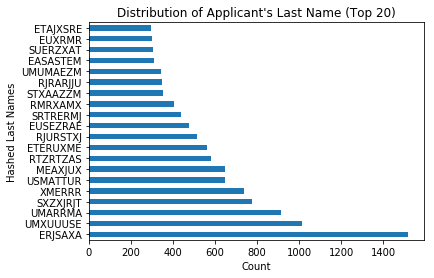

In [161]:
#Last Name

len(id_data['lastname'].unique())

#plot
fig = plt.figure()
fig = id_data['lastname'].value_counts().head(20).plot(kind='barh')
plt.title("Distribution of Applicant's Last Name (Top 20)")
plt.xlabel("Count")
plt.ylabel("Hashed Last Names")

Text(0,0.5,'Hashed Address')

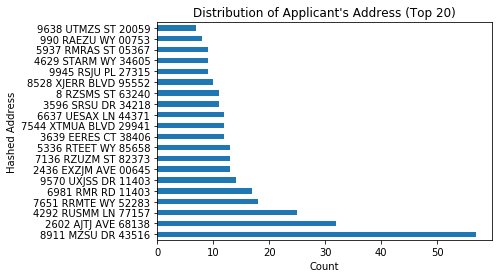

In [162]:
#address

len(id_data['address'].unique())

#plot
fig = plt.figure()
fig = id_data['address'].value_counts().head(20).plot(kind='barh')
plt.title("Distribution of Applicant's Address (Top 20)")
plt.xlabel("Count")
plt.ylabel("Hashed Address")

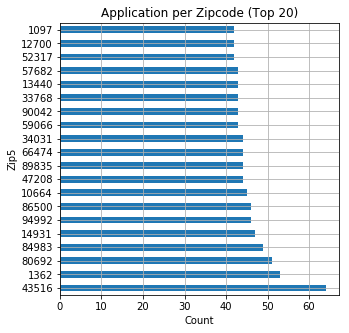

In [169]:
#Zip
len(id_data['zip5'].unique())
#plot histogram for application per ssn
fig=plt.figure(figsize=(5,5))
fig=id_data['zip5'].value_counts().head(20).plot(kind = 'barh')
plt.xlabel("Count")
plt.ylabel("Zip5")
plt.title("Application per Zipcode (Top 20)")
fig.grid()

Text(0.5,1,'Distribution of Applicants born per year')

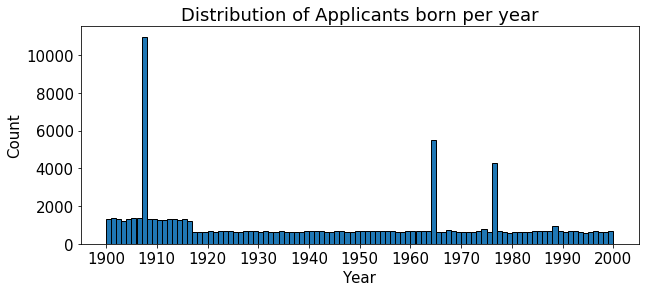

In [24]:
#DoB

#as dob's should be from 20th century, we add two more digits to year to avoid confusion
dob = (id_data['dob']).values.tolist()
for ind,element in enumerate(dob):
    temp = element.split('/')
    temp[2]='19'+temp[2]
    dob[ind]='/'.join(temp)

id_data['dob']=pd.DataFrame(dob) 

#unique values
len(id_data['dob'].unique())

#plot
fig=plt.figure(figsize=(5,5))
fig=id_data['dob'].value_counts().head(20).plot(kind = 'barh', log=True)
plt.xlabel("Count (Log Scaled)")
plt.ylabel("DoB")
plt.title("Application per each Date of Birth (Top 20)")
fig.grid()

#convert to datetime
id_data['dob']=pd.to_datetime(id_data['dob'],format="%m/%d/%Y",errors='coerce')

#plot hist for years
fig=plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
fig=id_data['dob'].hist(bins=100,edgecolor='black')
ax.grid(linewidth='0')
ax.xaxis.set_major_locator(mdates.YearLocator(base=10))
# set label
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Distribution of Applicants born per year")

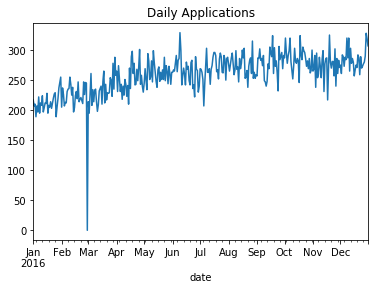

In [285]:
# rate of received applications (per day)
id_data.assign(trx = np.ones(len(id_data.index)))\
.set_index(pd.to_datetime(id_data['date']))\
.resample(dt.timedelta(days = 1))\
.count()\
.trx\
.plot(title = 'Daily Applications')

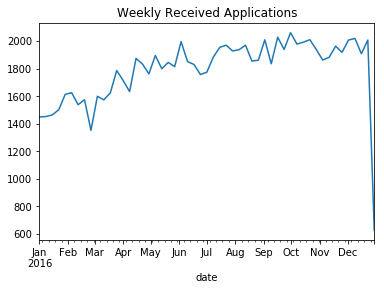

In [291]:
# rate of received applications (per Week)
id_data.assign(trx = np.ones(len(id_data.index)))\
.set_index(pd.to_datetime(id_data['date']))\
.resample(dt.timedelta(days = 7))\
.count()\
.trx\
.plot(title = 'Weekly Received Applications')

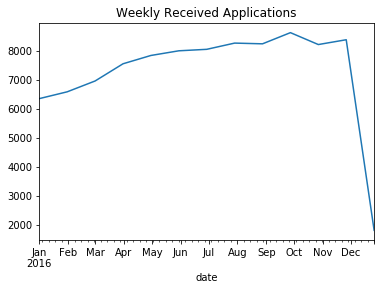

In [292]:
# rate of received applications (per month)
id_data.assign(trx = np.ones(len(id_data.index)))\
.set_index(pd.to_datetime(id_data['date']))\
.resample(dt.timedelta(days = 30))\
.count()\
.trx\
.plot(title = 'Weekly Received Applications')